# Headless

Please run all cells to get and save the figure that is similar to the figure in our experiments. We intentionally set **smaller episode number** to make readers can plot and reproduce the results in a short time, so the performance of algorithms will suffer a loss because of that. The results figure is saved in the current directory with name **test_results.png**. 

In [1]:
from mlagents_envs.environment import UnityEnvironment as UE
import numpy as np
import torch
import random
from collections import deque
from dqn_agent import Agent_withoutPER, Agent_withPER
import os
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

### Instruction - Use the correct environment path 
please use the correct version to run the test. The **first ENV_PATH** is for MACOS, the **second ENV_PATH** is for Windows.

In [2]:
ENV_PATH = "environment-MAC/en.app"

In [ ]:
ENV_PATH = "environment-Windows/en.exe"

In [3]:
f = open('best_parameters.json')
para_data = json.load(f)
para_mix = para_data['Mix-All']
para_DQN = para_data['DQN-vanilla']
para_PER = para_data['PER']
para_Noisy = para_data['Noisy_Net']
para_Dueling = para_data['Dueling']
para_Dueling_Noisy = para_data['Dueling+Noisy']
para_PER_Noisy = para_data['PER+Noisy']
para_Dueling_PER = para_data['Dueling+PER']

### Instruction - Change the port 
We use the port 5004 to run the envoriment. If you would like to change it, please change the number "5004" in line 9 of next cell to the port you would like to use. 

In [5]:
def initialise_env(ENV_PATH):
    """
    Initialise environment for testing
    
    Params
    ======
        ENV_PATH: The path of provided environment.
    """
    env = UE(base_port=5004,file_name=ENV_PATH, seed=1, side_channels=[])
    env.step()
    # in this project, we are only using one agent, so we will only work on the first `brain` in the environmet
    # get the default brain
    brain_name = list(env.behavior_specs.keys())[0]
    brain = env.behavior_specs[brain_name]
    return env, brain, brain_name

In [6]:
def reload_env():
    """
    Reload environment before testing.
    
    """
    env, brain, brain_name = initialise_env(ENV_PATH)
    spec = env.behavior_specs[brain_name]
    actions = []
    for act in range(5):
        actions.append(spec.action_spec.empty_action(1))
        actions[act].add_discrete(np.int32([[act]]))
    action_size = list(brain.action_spec)[1][0]
    state_size = len(brain.observation_specs)
    return env, brain, brain_name, actions, action_size, state_size 

In [7]:
def save_test_results(PER_flag, Dueling_flag, Noisy_flag):
    """
    Save average return per episode for each algorithm
    
    Params
    ======
        PER_flag: The flag of whether using PER or not.
        Dueling_flag: The flag of whether using Dueling or not.
        Noisy_flag: The flag of whether using Noisy Net or not.
    """
    if PER_flag == True:
        if Dueling_flag == True and Noisy_flag == True:
            agent = Agent_withPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag, capacity=para_mix['CAPACITY_PER'], gamma=para_mix['GAMMA'], prob_alpha=para_mix['PROB_ALPHA'], beta=para_mix['BETA'], batch_size=para_mix['BATCH_SIZE'], update_every=para_mix['UPDATE_EVERY'], tau=para_mix['TAU'], lr=para_mix['LR'])
            if os.path.isfile('./checkpoint_all.pth'):
                # load the weights from file
                print("yes!")
                agent.qnetwork_local.load_state_dict(torch.load('checkpoint_all.pth'))
        elif Dueling_flag == True and Noisy_flag == False:
            agent = Agent_withPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag, capacity=para_Dueling_PER['CAPACITY_PER'], gamma=para_Dueling_PER['GAMMA'], prob_alpha=para_Dueling_PER['PROB_ALPHA'], beta=para_Dueling_PER['BETA'], batch_size=para_Dueling_PER['BATCH_SIZE'], update_every=para_Dueling_PER['UPDATE_EVERY'], tau=para_Dueling_PER['TAU'], lr=para_Dueling_PER['LR'])
            if os.path.isfile('./checkpoint_Dueling_PER.pth'):
                # load the weights from file
                agent.qnetwork_local.load_state_dict(torch.load('checkpoint_Dueling_PER.pth'))
        
        elif Dueling_flag == False and Noisy_flag == True:
            agent = Agent_withPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag, capacity=para_PER_Noisy['CAPACITY_PER'], gamma=para_PER_Noisy['GAMMA'], prob_alpha=para_PER_Noisy['PROB_ALPHA'], beta=para_PER_Noisy['BETA'], batch_size=para_PER_Noisy['BATCH_SIZE'], update_every=para_PER_Noisy['UPDATE_EVERY'], tau=para_PER_Noisy['TAU'], lr=para_PER_Noisy['LR'])
            if os.path.isfile('./checkpoint_PER_Noisy.pth'):
                # load the weights from file
                agent.qnetwork_local.load_state_dict(torch.load('checkpoint_PER_Noisy.pth'))
        
        else:
            agent = Agent_withPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag, capacity=para_PER['CAPACITY_PER'], gamma=para_PER['GAMMA'], prob_alpha=para_PER['PROB_ALPHA'], beta=para_PER['BETA'], batch_size=para_PER['BATCH_SIZE'], update_every=para_PER['UPDATE_EVERY'], tau=para_PER['TAU'], lr=para_PER['LR'])    
            if os.path.isfile('./checkpoint_PER.pth'):
                # load the weights from file
                agent.qnetwork_local.load_state_dict(torch.load('checkpoint_PER.pth'))
    
    else:
        if Dueling_flag == True and Noisy_flag == True:
            agent = Agent_withoutPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag, buffer_size=para_Dueling_Noisy['BUFFER_SIZE'], gamma=para_Dueling_Noisy['GAMMA'], batch_size=para_Dueling_Noisy['BATCH_SIZE'], update_every=para_Dueling_Noisy['UPDATE_EVERY'], tau=para_Dueling_Noisy['TAU'], lr=para_Dueling_Noisy['LR'])
            if os.path.isfile('./checkpoint_Dueling_Noisy.pth'):
                # load the weights from file
                agent.qnetwork_local.load_state_dict(torch.load('checkpoint_Dueling_Noisy.pth'))
        
        elif Dueling_flag == True and Noisy_flag == False:
            agent = Agent_withoutPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag, buffer_size=para_Dueling['BUFFER_SIZE'], gamma=para_Dueling['GAMMA'], batch_size=para_Dueling['BATCH_SIZE'], update_every=para_Dueling['UPDATE_EVERY'], tau=para_Dueling['TAU'], lr=para_Dueling['LR'])
            if os.path.isfile('./checkpoint_Dueling.pth'):
                # load the weights from file
                agent.qnetwork_local.load_state_dict(torch.load('checkpoint_Dueling.pth'))
        
        elif Dueling_flag == False and Noisy_flag == True:
            agent = Agent_withoutPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag, buffer_size=para_Noisy['BUFFER_SIZE'], gamma=para_Noisy['GAMMA'], batch_size=para_Noisy['BATCH_SIZE'], update_every=para_Noisy['UPDATE_EVERY'], tau=para_Noisy['TAU'], lr=para_Noisy['LR'])
            if os.path.isfile('./checkpoint_Noisy.pth'):
                # load the weights from file
                agent.qnetwork_local.load_state_dict(torch.load('checkpoint_Noisy.pth'))
        
        else:
            agent = Agent_withoutPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag, buffer_size=para_DQN['BUFFER_SIZE'], gamma=para_DQN['GAMMA'], batch_size=para_DQN['BATCH_SIZE'], update_every=para_DQN['UPDATE_EVERY'], tau=para_DQN['TAU'], lr=para_DQN['LR'])
            if os.path.isfile('./checkpoint_vanilla.pth'):
                # load the weights from file
                agent.qnetwork_local.load_state_dict(torch.load('checkpoint_vanilla.pth'))


    
    scores, average_scores = test_agent(agent, n_episodes=10)
    test_results.append(average_scores)
    env.close()

In [8]:
# Initialize the list to save the average return per episode and their 95% CI.
test_results = []
CI_saved = []

In [9]:
def test_agent(agent, n_episodes=2, max_t=100, eps_start=1.0, eps_end=0.1, eps_decay=0.99):
    """
    DQN and its variants test.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    # choose the algorithm for the agent.
#     if PER_flag == True:
#         agent = Agent_withPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag)
#     else:
#         agent = Agent_withoutPER(state_size=state_size, action_size=action_size, seed=0, Dueling_flag=Dueling_flag, Noisy_flag=Noisy_flag)
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    average_scores = []
    
    
    rewards =0
    for i_episode in range(1, n_episodes+1):
        # every episode we reset the environment to start state
        env.reset()
#         print("~~~~~~~~~~~~~~~~~~~~")
        decision_steps, terminal_steps = env.get_steps(brain_name)
        ray_sensor_1 = decision_steps.obs[0]
        ray_sensor_2 = decision_steps.obs[1]
        state = np.concatenate((ray_sensor_1, ray_sensor_2), axis=1)
        
        tracked_agent = -1
        done = False
        score = 0
        for t in range(max_t):
            reward = 0
            if tracked_agent == -1 and len(decision_steps) >= 1:
                tracked_agent = decision_steps.agent_id[0]
            action = agent.act(state, eps)
            env.set_actions(brain_name, actions[action])
            env.step()
            
            decision_steps, terminal_steps = env.get_steps(brain_name)
            if len(decision_steps.obs[0]) != 1:
                env.reset()
            else: 
                ray_sensor_1 = decision_steps.obs[0]
                
            if len(decision_steps.obs[1]) != 1:
                env.reset()
            else: 
                ray_sensor_2 = decision_steps.obs[1]
                
            if len(decision_steps.obs[3]) == 0:
                env.reset()
            else: 
                battery = decision_steps.obs[3][0][0]

            next_state = np.concatenate((ray_sensor_1, ray_sensor_2), axis=1)
            
            if battery == 0: # if the battery use up, give a penalty
                reward = -2
            else:
                reward = 0

            if tracked_agent in decision_steps:# The agent requested a decision
                reward += decision_steps[tracked_agent].reward  # get the reward
                agent.step(state, action, reward, next_state, False)
            if tracked_agent in terminal_steps: # The agent terminated its episode
                reward += terminal_steps[tracked_agent].reward# get the reward
                agent.step(state, action, reward, next_state, True)
                break
                
            state = next_state
            score += reward
            
        
        scores_window.append(score)       # save most recent score
#         print(scores_window)
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        average_scores.append(np.mean(scores))
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
        print('\rEpisode {}\tScore: {:.2f}'.format(i_episode, score))
        if i_episode % 50 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            print('saved temporary learned weight')
        if score >=20.0:
            print('\nThie environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            print('agent done training for this episode')
            break
    return scores, average_scores

In [10]:
env, brain, brain_name, actions, action_size, state_size = reload_env()

[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

E0619 05:25:17.341002000 8639927808 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


In [11]:
# Test for mixing PER, Dueling, Noisy_net
PER_flag = True
Dueling_flag = True
Noisy_flag = True
save_test_results(PER_flag, Dueling_flag, Noisy_flag)

yes!
Episode 1	Average Score: 0.00
Episode 1	Score: 0.00
Episode 2	Average Score: 0.00
Episode 2	Score: 0.00
Episode 3	Average Score: 0.33
Episode 3	Score: 1.00
Episode 4	Average Score: 0.50
Episode 4	Score: 1.00
Episode 5	Average Score: 0.60
Episode 5	Score: 1.00
Episode 6	Average Score: 0.50
Episode 6	Score: 0.00
Episode 7	Average Score: 0.43
Episode 7	Score: 0.00
Episode 8	Average Score: 0.50
Episode 8	Score: 1.00
Episode 9	Average Score: 0.44
Episode 9	Score: 0.00
Episode 10	Average Score: 0.60
Episode 10	Score: 2.00


In [12]:
env, brain, brain_name, actions, action_size, state_size = reload_env()

E0619 05:27:01.935481000 8639927808 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [13]:
# Test for vanilla DQN
PER_flag = False
Dueling_flag = False
Noisy_flag = False
save_test_results(PER_flag, Dueling_flag, Noisy_flag)

Episode 1	Average Score: 0.00
Episode 1	Score: 0.00
Episode 2	Average Score: 0.00
Episode 2	Score: 0.00
Episode 3	Average Score: 0.33
Episode 3	Score: 1.00
Episode 4	Average Score: 0.50
Episode 4	Score: 1.00
Episode 5	Average Score: 0.60
Episode 5	Score: 1.00
Episode 6	Average Score: 0.50
Episode 6	Score: 0.00
Episode 7	Average Score: 0.43
Episode 7	Score: 0.00
Episode 8	Average Score: 0.38
Episode 8	Score: 0.00
Episode 9	Average Score: 0.33
Episode 9	Score: 0.00
Episode 10	Average Score: 0.40
Episode 10	Score: 1.00


In [14]:
env, brain, brain_name, actions, action_size, state_size = reload_env()

E0619 05:28:46.362440000 8639927808 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [15]:
# Test for PER
PER_flag = True
Dueling_flag = False
Noisy_flag = False
save_test_results(PER_flag, Dueling_flag, Noisy_flag)

Episode 1	Average Score: 0.00
Episode 1	Score: 0.00
Episode 2	Average Score: 0.00
Episode 2	Score: 0.00
Episode 3	Average Score: 0.33
Episode 3	Score: 1.00
Episode 4	Average Score: 0.50
Episode 4	Score: 1.00
Episode 5	Average Score: 0.40
Episode 5	Score: 0.00
Episode 6	Average Score: 0.33
Episode 6	Score: 0.00
Episode 7	Average Score: 0.29
Episode 7	Score: 0.00
Episode 8	Average Score: 0.25
Episode 8	Score: 0.00
Episode 9	Average Score: 0.22
Episode 9	Score: 0.00
Episode 10	Average Score: 0.40
Episode 10	Score: 2.00


In [16]:
env, brain, brain_name, actions, action_size, state_size = reload_env()

E0619 05:30:30.736787000 8639927808 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [17]:
# Teset for Noisy Net
PER_flag = False
Dueling_flag = False
Noisy_flag = True
save_test_results(PER_flag, Dueling_flag, Noisy_flag)

Episode 1	Average Score: 0.00
Episode 1	Score: 0.00
Episode 2	Average Score: 0.00
Episode 2	Score: 0.00
Episode 3	Average Score: 0.33
Episode 3	Score: 1.00
Episode 4	Average Score: 0.50
Episode 4	Score: 1.00
Episode 5	Average Score: 0.40
Episode 5	Score: 0.00
Episode 6	Average Score: 0.33
Episode 6	Score: 0.00
Episode 7	Average Score: 0.29
Episode 7	Score: 0.00
Episode 8	Average Score: 0.25
Episode 8	Score: 0.00
Episode 9	Average Score: 0.33
Episode 9	Score: 1.00
Episode 10	Average Score: 0.60
Episode 10	Score: 3.00


In [18]:
env, brain, brain_name, actions, action_size, state_size = reload_env()

E0619 05:32:14.984924000 8639927808 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [19]:
# Teset for Dueling
PER_flag = False
Dueling_flag = True
Noisy_flag = False
save_test_results(PER_flag, Dueling_flag, Noisy_flag)

Episode 1	Average Score: 0.00
Episode 1	Score: 0.00
Episode 2	Average Score: 0.00
Episode 2	Score: 0.00
Episode 3	Average Score: 0.33
Episode 3	Score: 1.00
Episode 4	Average Score: 0.50
Episode 4	Score: 1.00
Episode 5	Average Score: 0.60
Episode 5	Score: 1.00
Episode 6	Average Score: 0.50
Episode 6	Score: 0.00
Episode 7	Average Score: 0.43
Episode 7	Score: 0.00
Episode 8	Average Score: 0.38
Episode 8	Score: 0.00
Episode 9	Average Score: 0.33
Episode 9	Score: 0.00
Episode 10	Average Score: 0.40
Episode 10	Score: 1.00


In [20]:
env, brain, brain_name, actions, action_size, state_size = reload_env()

E0619 05:33:59.237545000 8639927808 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [21]:
# Teset for Dueling with Noisy-Net
PER_flag = False
Dueling_flag = True
Noisy_flag = True
save_test_results(PER_flag, Dueling_flag, Noisy_flag)

Episode 1	Average Score: 0.00
Episode 1	Score: 0.00
Episode 2	Average Score: 0.00
Episode 2	Score: 0.00
Episode 3	Average Score: 0.33
Episode 3	Score: 1.00
Episode 4	Average Score: 0.50
Episode 4	Score: 1.00
Episode 5	Average Score: 0.60
Episode 5	Score: 1.00
Episode 6	Average Score: 0.50
Episode 6	Score: 0.00
Episode 7	Average Score: 0.43
Episode 7	Score: 0.00
Episode 8	Average Score: 0.38
Episode 8	Score: 0.00
Episode 9	Average Score: 0.33
Episode 9	Score: 0.00
Episode 10	Average Score: 0.50
Episode 10	Score: 2.00


In [22]:
env, brain, brain_name, actions, action_size, state_size = reload_env()

E0619 05:35:43.643818000 8639927808 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [23]:
# Teset for Noisy-Net with PER
PER_flag = True
Dueling_flag = False
Noisy_flag = True
save_test_results(PER_flag, Dueling_flag, Noisy_flag)

Episode 1	Average Score: 0.00
Episode 1	Score: 0.00
Episode 2	Average Score: 0.00
Episode 2	Score: 0.00
Episode 3	Average Score: 0.33
Episode 3	Score: 1.00
Episode 4	Average Score: 0.50
Episode 4	Score: 1.00
Episode 5	Average Score: 0.60
Episode 5	Score: 1.00
Episode 6	Average Score: 0.50
Episode 6	Score: 0.00
Episode 7	Average Score: 0.43
Episode 7	Score: 0.00
Episode 8	Average Score: 0.12
Episode 8	Score: -2.00
Episode 9	Average Score: 0.11
Episode 9	Score: 0.00
Episode 10	Average Score: 0.30
Episode 10	Score: 2.00


In [24]:
env, brain, brain_name, actions, action_size, state_size = reload_env()

E0619 05:37:29.541504000 8639927808 fork_posix.cc:76]                  Other threads are currently calling into gRPC, skipping fork() handlers


[UnityMemory] Configuration Parameters - Can be set up in boot.config
    "memorysetup-bucket-allocator-granularity=16"
    "memorysetup-bucket-allocator-bucket-count=8"
    "memorysetup-bucket-allocator-block-size=4194304"
    "memorysetup-bucket-allocator-block-count=1"
    "memorysetup-main-allocator-block-size=16777216"
    "memorysetup-thread-allocator-block-size=16777216"
    "memorysetup-gfx-main-allocator-block-size=16777216"
    "memorysetup-gfx-thread-allocator-block-size=16777216"
    "memorysetup-cache-allocator-block-size=4194304"
    "memorysetup-typetree-allocator-block-size=2097152"
    "memorysetup-profiler-bucket-allocator-granularity=16"
    "memorysetup-profiler-bucket-allocator-bucket-count=8"
    "memorysetup-profiler-bucket-allocator-block-size=4194304"
    "memorysetup-profiler-bucket-allocator-block-count=1"
    "memorysetup-profiler-allocator-block-size=16777216"
    "memorysetup-profiler-editor-allocator-block-size=1048576"
    "memorysetup-temp-allocator-siz

In [25]:
# Teset for Dueling with PER
PER_flag = True
Dueling_flag = True
Noisy_flag = False
save_test_results(PER_flag, Dueling_flag, Noisy_flag)

Episode 1	Average Score: 0.00
Episode 1	Score: 0.00
Episode 2	Average Score: 0.00
Episode 2	Score: 0.00
Episode 3	Average Score: 0.33
Episode 3	Score: 1.00
Episode 4	Average Score: 0.50
Episode 4	Score: 1.00
Episode 5	Average Score: 0.60
Episode 5	Score: 1.00
Episode 6	Average Score: 0.50
Episode 6	Score: 0.00
Episode 7	Average Score: 0.43
Episode 7	Score: 0.00
Episode 8	Average Score: 0.38
Episode 8	Score: 0.00
Episode 9	Average Score: 0.33
Episode 9	Score: 0.00
Episode 10	Average Score: 0.40
Episode 10	Score: 1.00


In [27]:
# compute the CIs for lineplots
for i in range(len(test_results)):
    ci = 1.96 * np.std(test_results[i])/np.sqrt(len(test_results[i]))
    CI_saved.append(ci)

####  Plot test performance

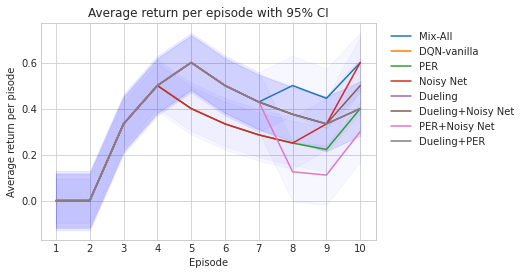

In [29]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots()
    ax.plot(range(1,11), test_results[0], label='Mix-All')
    ax.fill_between(range(1,11), (test_results[0]-CI_saved[0]), (test_results[0]+CI_saved[0]), color='b', alpha=.03)
    ax.plot(range(1,11), test_results[1], label='DQN-vanilla')
    ax.fill_between(range(1,11), (test_results[1]-CI_saved[1]), (test_results[1]+CI_saved[1]), color='b', alpha=.03)
    ax.plot(range(1,11), test_results[2], label='PER')
    ax.fill_between(range(1,11), (test_results[2]-CI_saved[2]), (test_results[2]+CI_saved[2]), color='b', alpha=.03)
    ax.plot(range(1,11), test_results[3], label='Noisy Net')
    ax.fill_between(range(1,11), (test_results[3]-CI_saved[3]), (test_results[3]+CI_saved[3]), color='b', alpha=.03)
    ax.plot(range(1,11), test_results[4], label='Dueling')
    ax.fill_between(range(1,11), (test_results[4]-CI_saved[4]), (test_results[4]+CI_saved[4]), color='b', alpha=.03)
    ax.plot(range(1,11), test_results[5], label='Dueling+Noisy Net')
    ax.fill_between(range(1,11), (test_results[5]-CI_saved[5]), (test_results[5]+CI_saved[5]), color='b', alpha=.03)
    ax.plot(range(1,11), test_results[6], label='PER+Noisy Net')
    ax.fill_between(range(1,11), (test_results[6]-CI_saved[6]), (test_results[6]+CI_saved[6]), color='b', alpha=.03)
    ax.plot(range(1,11), test_results[7], label='Dueling+PER')
    ax.fill_between(range(1,11), (test_results[7]-CI_saved[7]), (test_results[7]+CI_saved[7]), color='b', alpha=.03)
    ax.set_xlabel('Episode')
    ax.set_ylabel('Average return per pisode')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_title('Average return per episode with 95% CI')
    ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.savefig("test_results.png", dpi=180, bbox_inches='tight')
plt.show()
